# PROJECT DESCRIPTION

I am working on a football analytics project that analyzes **event data** from matches to understand how **location, shot type, and event patterns** affect scoring probability.  
The dataset includes detailed match events (shots, passes, penalties, etc.) collected from multiple matches.

The goal is to **identify patterns that determine whether a shot results in a goal or not**, helping analysts understand performance and create data-driven strategies.

With access to data containing thousands of events, I explore:
- Shot locations and their outcomes  
- Penalty conversion rates  
- The foundation for building an **Expected Goals (xG)** model

This project demonstrates how **data analysis and statistical modeling** can be used in **sports analytics** to provide insights for coaches, analysts, and teams.

## ABOUT THE DATASET

event_type
0	Announcement
1	Attempt
2	Corner
3	Foul
4	Yellow card
5	Second yellow card
6	Red card
7	Substitution
8	Free kick won
9	Offside
10	Hand ball
11	Penalty conceded


event_type2
12	Key Pass
13	Failed through ball
14	Sending off
15	Own goal


side
1	Home
2	Away


shot_place
1	Bit too high
2	Blocked
3	Bottom left corner
4	Bottom right corner
5	Centre of the goal
6	High and wide
7	Hits the bar
8	Misses to the left
9	Misses to the right
10	Too high
11	Top centre of the goal
12	Top left corner
13	Top right corner


shot_outcome
1	On target
2	Off target
3	Blocked
4	Hit the bar


location
1	Attacking half
2	Defensive half
3	Centre of the box
4	Left wing
5	Right wing
6	Difficult angle and long range
7	Difficult angle on the left
8	Difficult angle on the right
9	Left side of the box
10	Left side of the six yard box
11	Right side of the box
12	Right side of the six yard box
13	Very close range
14	Penalty spot
15	Outside the box
16	Long range
17	More than 35 yards
18	More than 40 yards
19	Not recorded


bodypart
1	right foot
2	left foot
3	head


assist_method
0	None
1	Pass
2	Cross
3	Headed pass
4	Through ball


situation
1	Open play
2	Set piece
3	Corner
4	Free kick

In [46]:
import pandas as pd
import numpy as np

# DATA PREPARATION 

In [49]:
df = pd.read_csv("C:/Users/USER/Documents/events.csv")

In [51]:
df

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,...,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,6.0,2.0,0,9.0,2.0,1,1.0,0
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,3,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8,NaN,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941004,z5L2OT5E/,z5L2OT5E123,123,92,Lucas Torreira (Sampdoria) wins a free kick in...,8,NaN,2,Sampdoria,Atalanta,...,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0
941005,z5L2OT5E/,z5L2OT5E124,124,93,"Corner, Sampdoria. Conceded by Andrea Masiello.",2,NaN,2,Sampdoria,Atalanta,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
941006,z5L2OT5E/,z5L2OT5E125,125,93,Attempt missed. Fabio Quagliarella (Sampdoria)...,1,12.0,2,Sampdoria,Atalanta,...,NaN,NaN,8.0,2.0,0,9.0,1.0,1,3.0,0
941007,z5L2OT5E/,z5L2OT5E126,126,94,Alberto Grassi (Atalanta) wins a free kick on ...,8,NaN,1,Atalanta,Sampdoria,...,NaN,NaN,NaN,NaN,0,4.0,NaN,0,NaN,0


In [52]:
df.columns

Index(['id_odsp', 'id_event', 'sort_order', 'time', 'text', 'event_type',
       'event_type2', 'side', 'event_team', 'opponent', 'player', 'player2',
       'player_in', 'player_out', 'shot_place', 'shot_outcome', 'is_goal',
       'location', 'bodypart', 'assist_method', 'situation', 'fast_break'],
      dtype='object')

In [53]:
pens = df[df['location'] == 14]

In [57]:
pens

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,...,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
1568,xtklbWLh/,xtklbWLh22,22,18,"Goal! Hannover 1, 1899 Hoffenheim 1. Sejad Sa...",1,NaN,2,TSG Hoffenheim,Hannover 96,...,NaN,NaN,12.0,1.0,1,14.0,2.0,0,2.0,0
1579,xtklbWLh/,xtklbWLh33,33,30,"Goal! Hannover 2, 1899 Hoffenheim 1. Mohammed...",1,NaN,1,Hannover 96,TSG Hoffenheim,...,NaN,NaN,3.0,1.0,1,14.0,2.0,0,2.0,0
1821,84Llk2m6/,84Llk2m662,62,56,"Goal! Bordeaux 1, St Etienne 2. Jussie (Borde...",1,NaN,1,Bordeaux,St Etienne,...,NaN,NaN,3.0,1.0,1,14.0,1.0,0,2.0,0
1908,fLN0n0XO/,fLN0n0XO38,38,32,Penalty missed! Bad penalty by Julien FA©ret (...,1,NaN,2,Stade Rennes,Dijon FCO,...,NaN,NaN,1.0,2.0,0,14.0,1.0,0,2.0,0
1946,fLN0n0XO/,fLN0n0XO76,76,57,"Penalty missed! Still Dijon 1, Rennes 3. Greg...",1,NaN,2,Stade Rennes,Dijon FCO,...,NaN,NaN,7.0,4.0,0,14.0,1.0,0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940068,r5V5rw33/,r5V5rw33113,113,93,"Goal! Arsenal 1, Burnley 1. Andre Gray (Burnl...",1,NaN,2,Burnley,Arsenal,...,NaN,NaN,5.0,1.0,1,14.0,1.0,0,2.0,0
940075,r5V5rw33/,r5V5rw33120,120,98,"Goal! Arsenal 2, Burnley 1. Alexis Sanchez (A...",1,NaN,1,Arsenal,Burnley,...,NaN,NaN,5.0,1.0,1,14.0,1.0,0,2.0,0
940383,UP9lzFAq/,UP9lzFAq89,89,86,"Goal! Southampton 3, Leicester City 0. Dusan ...",1,NaN,1,Southampton,Leicester City,...,NaN,NaN,13.0,1.0,1,14.0,2.0,0,2.0,0
940567,xAkY8l6R/,xAkY8l6R74,74,66,"Goal! Genoa 2, Crotone 1. Lucas Ocampos (Geno...",1,NaN,1,Genoa,Crotone,...,NaN,NaN,4.0,1.0,1,14.0,1.0,0,2.0,0


In [59]:
df = df[df['event_type'] == 1]

In [61]:
df

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,...,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,6.0,2.0,0,9.0,2.0,1,1.0,0
11,UFot0hit/,UFot0hit12,12,14,Attempt missed. Shinji Kagawa (Borussia Dortmu...,1,12.0,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,13.0,2.0,0,15.0,1.0,1,1.0,0
13,UFot0hit/,UFot0hit14,14,17,"Goal! Borussia Dortmund 1, Hamburg 0. Kevin G...",1,12.0,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,4.0,1.0,1,9.0,2.0,1,1.0,0
14,UFot0hit/,UFot0hit15,15,19,Attempt blocked. Mats Hummels (Borussia Dortmu...,1,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,2.0,3.0,0,15.0,1.0,0,1.0,0
17,UFot0hit/,UFot0hit18,18,20,Attempt blocked. Tomas Rincon (Hamburg) right ...,1,NaN,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,2.0,3.0,0,15.0,1.0,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940983,z5L2OT5E/,z5L2OT5E102,102,81,Attempt blocked. Remo Freuler (Atalanta) right...,1,NaN,1,Atalanta,Sampdoria,...,NaN,NaN,2.0,3.0,0,15.0,1.0,0,1.0,0
940991,z5L2OT5E/,z5L2OT5E110,110,84,Attempt missed. Alberto Grassi (Atalanta) righ...,1,12.0,1,Atalanta,Sampdoria,...,NaN,NaN,10.0,2.0,0,15.0,1.0,1,1.0,0
940992,z5L2OT5E/,z5L2OT5E111,111,86,Attempt saved. Alejandro Gomez (Atalanta) righ...,1,12.0,1,Atalanta,Sampdoria,...,NaN,NaN,5.0,1.0,0,9.0,1.0,1,1.0,0
940993,z5L2OT5E/,z5L2OT5E112,112,87,Attempt saved. Fabio Quagliarella (Sampdoria) ...,1,12.0,2,Sampdoria,Atalanta,...,NaN,NaN,5.0,1.0,0,15.0,1.0,1,1.0,0


In [62]:
df.location.value_counts()

location
15.0    93667
3.0     69606
9.0     19033
11.0    18441
13.0     6661
10.0     3492
12.0     3426
14.0     2596
7.0      2563
8.0      2458
16.0     1991
17.0     1978
6.0      1517
19.0     1450
18.0      256
Name: count, dtype: int64

In [65]:
df = df[df['event_type2'] != 15]

In [67]:
df

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,...,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,6.0,2.0,0,9.0,2.0,1,1.0,0
11,UFot0hit/,UFot0hit12,12,14,Attempt missed. Shinji Kagawa (Borussia Dortmu...,1,12.0,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,13.0,2.0,0,15.0,1.0,1,1.0,0
13,UFot0hit/,UFot0hit14,14,17,"Goal! Borussia Dortmund 1, Hamburg 0. Kevin G...",1,12.0,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,4.0,1.0,1,9.0,2.0,1,1.0,0
14,UFot0hit/,UFot0hit15,15,19,Attempt blocked. Mats Hummels (Borussia Dortmu...,1,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,2.0,3.0,0,15.0,1.0,0,1.0,0
17,UFot0hit/,UFot0hit18,18,20,Attempt blocked. Tomas Rincon (Hamburg) right ...,1,NaN,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,2.0,3.0,0,15.0,1.0,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940983,z5L2OT5E/,z5L2OT5E102,102,81,Attempt blocked. Remo Freuler (Atalanta) right...,1,NaN,1,Atalanta,Sampdoria,...,NaN,NaN,2.0,3.0,0,15.0,1.0,0,1.0,0
940991,z5L2OT5E/,z5L2OT5E110,110,84,Attempt missed. Alberto Grassi (Atalanta) righ...,1,12.0,1,Atalanta,Sampdoria,...,NaN,NaN,10.0,2.0,0,15.0,1.0,1,1.0,0
940992,z5L2OT5E/,z5L2OT5E111,111,86,Attempt saved. Alejandro Gomez (Atalanta) righ...,1,12.0,1,Atalanta,Sampdoria,...,NaN,NaN,5.0,1.0,0,9.0,1.0,1,1.0,0
940993,z5L2OT5E/,z5L2OT5E112,112,87,Attempt saved. Fabio Quagliarella (Sampdoria) ...,1,12.0,2,Sampdoria,Atalanta,...,NaN,NaN,5.0,1.0,0,15.0,1.0,1,1.0,0


In [68]:
df.isnull().sum()

id_odsp               0
id_event              0
sort_order            0
time                  0
text                  0
event_type            0
event_type2       60575
side                  0
event_team            0
opponent              0
player               13
player2           60636
player_in        228434
player_out       228434
shot_place         1034
shot_outcome         12
is_goal               0
location              0
bodypart              0
assist_method         0
situation             0
fast_break            0
dtype: int64

In [70]:
df = df[df['shot_place'].notna()]

In [73]:
df

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,...,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,6.0,2.0,0,9.0,2.0,1,1.0,0
11,UFot0hit/,UFot0hit12,12,14,Attempt missed. Shinji Kagawa (Borussia Dortmu...,1,12.0,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,13.0,2.0,0,15.0,1.0,1,1.0,0
13,UFot0hit/,UFot0hit14,14,17,"Goal! Borussia Dortmund 1, Hamburg 0. Kevin G...",1,12.0,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,4.0,1.0,1,9.0,2.0,1,1.0,0
14,UFot0hit/,UFot0hit15,15,19,Attempt blocked. Mats Hummels (Borussia Dortmu...,1,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,2.0,3.0,0,15.0,1.0,0,1.0,0
17,UFot0hit/,UFot0hit18,18,20,Attempt blocked. Tomas Rincon (Hamburg) right ...,1,NaN,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,2.0,3.0,0,15.0,1.0,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940983,z5L2OT5E/,z5L2OT5E102,102,81,Attempt blocked. Remo Freuler (Atalanta) right...,1,NaN,1,Atalanta,Sampdoria,...,NaN,NaN,2.0,3.0,0,15.0,1.0,0,1.0,0
940991,z5L2OT5E/,z5L2OT5E110,110,84,Attempt missed. Alberto Grassi (Atalanta) righ...,1,12.0,1,Atalanta,Sampdoria,...,NaN,NaN,10.0,2.0,0,15.0,1.0,1,1.0,0
940992,z5L2OT5E/,z5L2OT5E111,111,86,Attempt saved. Alejandro Gomez (Atalanta) righ...,1,12.0,1,Atalanta,Sampdoria,...,NaN,NaN,5.0,1.0,0,9.0,1.0,1,1.0,0
940993,z5L2OT5E/,z5L2OT5E112,112,87,Attempt saved. Fabio Quagliarella (Sampdoria) ...,1,12.0,2,Sampdoria,Atalanta,...,NaN,NaN,5.0,1.0,0,15.0,1.0,1,1.0,0


In [74]:
df.isnull().sum()

id_odsp               0
id_event              0
sort_order            0
time                  0
text                  0
event_type            0
event_type2       60259
side                  0
event_team            0
opponent              0
player                1
player2           60320
player_in        227400
player_out       227400
shot_place            0
shot_outcome          0
is_goal               0
location              0
bodypart              0
assist_method         0
situation             0
fast_break            0
dtype: int64

In [76]:
df.event_type2.value_counts()

event_type2
12.0    167141
Name: count, dtype: int64

In [79]:
df.fillna(16, inplace = True)

C:\Users\USER\AppData\Local\Temp\ipykernel_12856\3896638161.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(16, inplace = True)
C:\Users\USER\AppData\Local\Temp\ipykernel_12856\3896638161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(16, inplace = True)


In [80]:
df

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,...,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,...,16,16,6.0,2.0,0,9.0,2.0,1,1.0,0
11,UFot0hit/,UFot0hit12,12,14,Attempt missed. Shinji Kagawa (Borussia Dortmu...,1,12.0,1,Borussia Dortmund,Hamburg SV,...,16,16,13.0,2.0,0,15.0,1.0,1,1.0,0
13,UFot0hit/,UFot0hit14,14,17,"Goal! Borussia Dortmund 1, Hamburg 0. Kevin G...",1,12.0,1,Borussia Dortmund,Hamburg SV,...,16,16,4.0,1.0,1,9.0,2.0,1,1.0,0
14,UFot0hit/,UFot0hit15,15,19,Attempt blocked. Mats Hummels (Borussia Dortmu...,1,16.0,1,Borussia Dortmund,Hamburg SV,...,16,16,2.0,3.0,0,15.0,1.0,0,1.0,0
17,UFot0hit/,UFot0hit18,18,20,Attempt blocked. Tomas Rincon (Hamburg) right ...,1,16.0,2,Hamburg SV,Borussia Dortmund,...,16,16,2.0,3.0,0,15.0,1.0,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940983,z5L2OT5E/,z5L2OT5E102,102,81,Attempt blocked. Remo Freuler (Atalanta) right...,1,16.0,1,Atalanta,Sampdoria,...,16,16,2.0,3.0,0,15.0,1.0,0,1.0,0
940991,z5L2OT5E/,z5L2OT5E110,110,84,Attempt missed. Alberto Grassi (Atalanta) righ...,1,12.0,1,Atalanta,Sampdoria,...,16,16,10.0,2.0,0,15.0,1.0,1,1.0,0
940992,z5L2OT5E/,z5L2OT5E111,111,86,Attempt saved. Alejandro Gomez (Atalanta) righ...,1,12.0,1,Atalanta,Sampdoria,...,16,16,5.0,1.0,0,9.0,1.0,1,1.0,0
940993,z5L2OT5E/,z5L2OT5E112,112,87,Attempt saved. Fabio Quagliarella (Sampdoria) ...,1,12.0,2,Sampdoria,Atalanta,...,16,16,5.0,1.0,0,15.0,1.0,1,1.0,0


In [81]:
df.isnull().sum()

id_odsp          0
id_event         0
sort_order       0
time             0
text             0
event_type       0
event_type2      0
side             0
event_team       0
opponent         0
player           0
player2          0
player_in        0
player_out       0
shot_place       0
shot_outcome     0
is_goal          0
location         0
bodypart         0
assist_method    0
situation        0
fast_break       0
dtype: int64

In [84]:
df.drop(['shot_place', 'shot_outcome', 'time', 'id_odsp', 'id_event', 'sort_order', 'text', 'event_type', 'event_type2', 'side', 'event_team', 'opponent', 'player_in', 'player_out', 'player', 'player2'], axis = 1, inplace = True)

C:\Users\USER\AppData\Local\Temp\ipykernel_12856\3478105855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['shot_place', 'shot_outcome', 'time', 'id_odsp', 'id_event', 'sort_order', 'text', 'event_type', 'event_type2', 'side', 'event_team', 'opponent', 'player_in', 'player_out', 'player', 'player2'], axis = 1, inplace = True)


In [86]:
df

,is_goal,location,bodypart,assist_method,situation,fast_break
0,0,9.0,2.0,1,1.0,0
11,0,15.0,1.0,1,1.0,0
13,1,9.0,2.0,1,1.0,0
14,0,15.0,1.0,0,1.0,0
17,0,15.0,1.0,0,1.0,0
...,...,...,...,...,...,...
940983,0,15.0,1.0,0,1.0,0
940991,0,15.0,1.0,1,1.0,0
940992,0,9.0,1.0,1,1.0,0
940993,0,15.0,1.0,1,1.0,0


In [89]:
df.dtypes

is_goal            int64
location         float64
bodypart         float64
assist_method      int64
situation        float64
fast_break         int64
dtype: object

In [91]:
df.astype({
          'is_goal': int,
          'location': int, 
          'bodypart': int,
          'assist_method': int,
          'situation': int,
          'fast_break': int
})

,is_goal,location,bodypart,assist_method,situation,fast_break
0,0,9,2,1,1,0
11,0,15,1,1,1,0
13,1,9,2,1,1,0
14,0,15,1,0,1,0
17,0,15,1,0,1,0
...,...,...,...,...,...,...
940983,0,15,1,0,1,0
940991,0,15,1,1,1,0
940992,0,9,1,1,1,0
940993,0,15,1,1,1,0


In [93]:
df.is_goal.value_counts()

is_goal
0    204682
1     22718
Name: count, dtype: int64

In [95]:
x = df.drop(['is_goal'], axis = 1)
y = df['is_goal']

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, log_loss, brier_score_loss

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [99]:
model = LogisticRegression(max_iter = 1000)

In [100]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [101]:
y_pred_proba = model.predict_proba(x_test) [:, 1]

In [107]:
y_pred = model.predict(x_test)  

In [109]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [111]:
print(f"First prediction: {y_pred_proba[0]:.6f}")
print(f"Max xG in test set: {np.min(y_pred_proba):.20f}")
print(f"Average xG: {np.mean(y_pred_proba):.6f}")

First prediction: 0.064153
Max xG in test set: 0.03606897110596381933
Average xG: 0.099836


In [113]:
final_df = x_test.copy()
final_df['goal_probability'] = y_pred_proba

In [115]:
final_df.iloc[386]

location            11.000000
bodypart             1.000000
assist_method        1.000000
situation            1.000000
fast_break           0.000000
goal_probability     0.084733
Name: 570332, dtype: float64

In [117]:
final_df

,location,bodypart,assist_method,situation,fast_break,goal_probability
557291,15.0,1.0,1,1.0,0,0.064153
220866,13.0,2.0,3,3.0,0,0.145601
480963,15.0,2.0,0,1.0,0,0.046529
139138,3.0,1.0,2,1.0,0,0.153881
303216,15.0,1.0,1,1.0,0,0.064153
...,...,...,...,...,...,...
816151,3.0,1.0,1,1.0,0,0.144456
171632,15.0,2.0,1,1.0,0,0.049938
868515,15.0,1.0,1,1.0,0,0.064153
363636,3.0,1.0,1,1.0,0,0.144456


In [119]:
final_df.goal_probability.min()

0.03606897110596382

In [121]:
lowest_row = final_df.sort_values(by='goal_probability', ascending=True).head()
lowest_row

,location,bodypart,assist_method,situation,fast_break,goal_probability
447795,15.0,3.0,0,1.0,0,0.036069
488359,15.0,3.0,0,1.0,0,0.036069
107814,15.0,3.0,0,1.0,0,0.036069
409606,15.0,3.0,0,1.0,0,0.036069
327741,15.0,3.0,0,1.0,0,0.036069


In [123]:
penalty = final_df[final_df['location'] == 14]
penalty.head(30)

,location,bodypart,assist_method,situation,fast_break,goal_probability
57253,14.0,2.0,0,2.0,0,0.075424
334829,14.0,1.0,0,2.0,0,0.096159
906264,14.0,1.0,0,2.0,0,0.096159
265590,14.0,1.0,0,2.0,0,0.096159
407243,14.0,1.0,0,2.0,0,0.096159
377921,14.0,2.0,0,2.0,0,0.075424
89122,14.0,2.0,0,2.0,0,0.075424
860248,14.0,2.0,0,2.0,0,0.075424
542427,14.0,1.0,0,2.0,0,0.096159
621313,14.0,2.0,0,2.0,0,0.075424


In [125]:
final_df

,location,bodypart,assist_method,situation,fast_break,goal_probability
557291,15.0,1.0,1,1.0,0,0.064153
220866,13.0,2.0,3,3.0,0,0.145601
480963,15.0,2.0,0,1.0,0,0.046529
139138,3.0,1.0,2,1.0,0,0.153881
303216,15.0,1.0,1,1.0,0,0.064153
...,...,...,...,...,...,...
816151,3.0,1.0,1,1.0,0,0.144456
171632,15.0,2.0,1,1.0,0,0.049938
868515,15.0,1.0,1,1.0,0,0.064153
363636,3.0,1.0,1,1.0,0,0.144456


# DATA VISUALIZATION & EXPLORATORY ANALYSIS

Data loaded successfully: 45480 rows


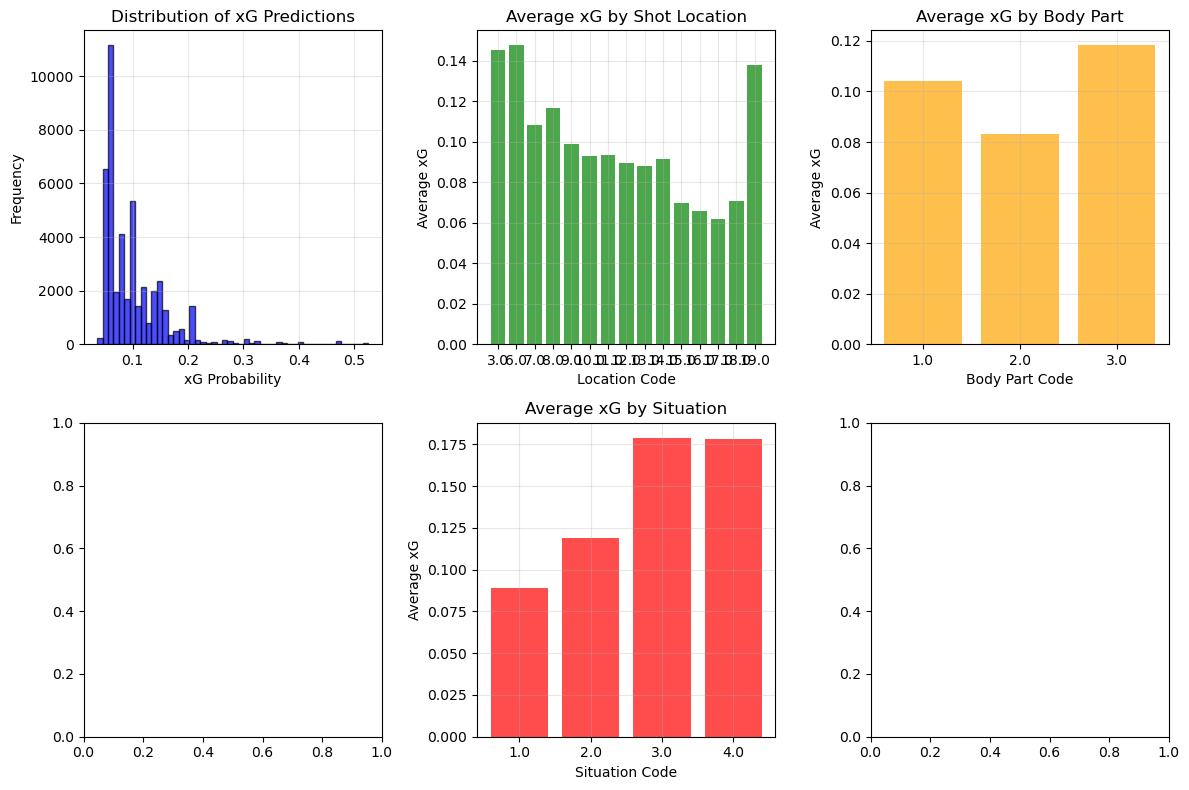

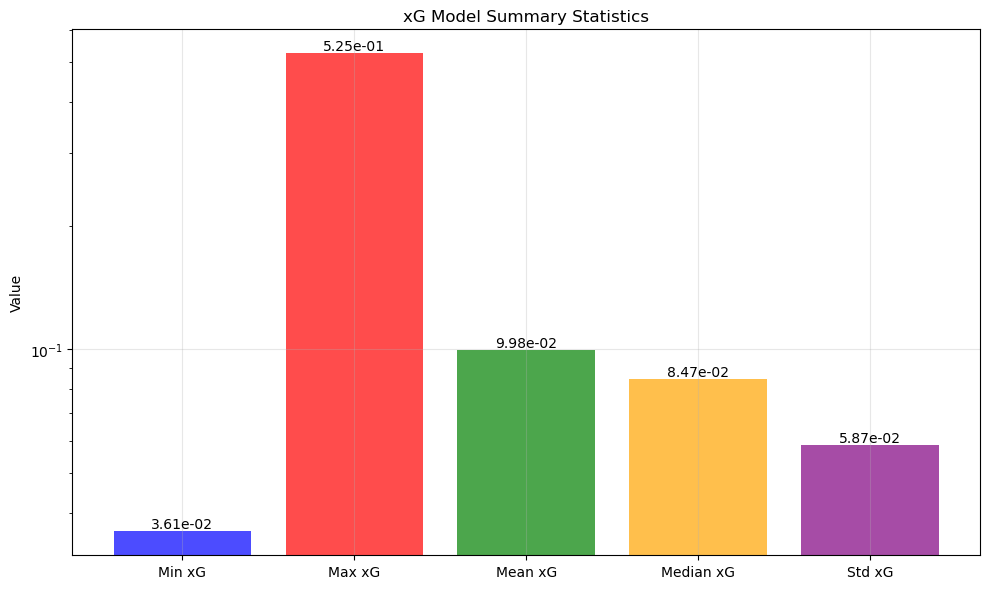

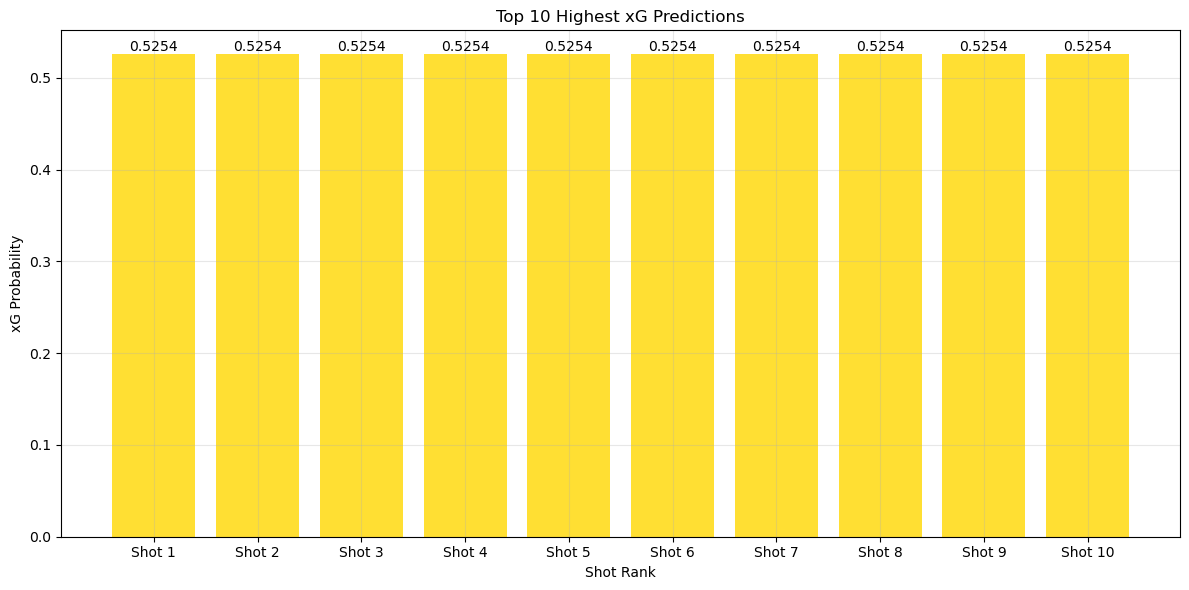


=== XG MODEL INSIGHTS ===
Total shots analyzed: 45,480
Average xG per shot: 0.099836
Highest xG prediction: 0.525428
Shots with xG > 0.1: 15099
Shots with xG > 0.01: 45480
Percentage of shots with xG < 0.001: 0.0%

✅ Visualization completed successfully!


In [137]:
# Set up the plotting style
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)

try:
    # Check if final_df exists
    if 'final_df' not in dir():
        raise NameError("final_df is not defined. Please load your data first.")
    
    # Check for required columns
    required_columns = ['goal_probability', 'location', 'bodypart', 'time', 'situation', 'shot_outcome']
    missing_cols = [col for col in required_columns if col not in final_df.columns]
    if missing_cols:
        print(f"Warning: Missing columns: {missing_cols}")
    
    print(f"Data loaded successfully: {len(final_df)} rows")
    
    # 1. Distribution of xG predictions
    plt.figure(figsize=(12, 8))
    
    # Subplot 1: Histogram of xG values
    plt.subplot(2, 3, 1)
    plt.hist(final_df['goal_probability'].dropna(), bins=50, alpha=0.7, color='blue', edgecolor='black')
    plt.title('Distribution of xG Predictions')
    plt.xlabel('xG Probability')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    
    # Subplot 2: xG by shot location
    plt.subplot(2, 3, 2)
    if 'location' in final_df.columns:
        location_xg = final_df.groupby('location')['goal_probability'].mean()
        plt.bar(range(len(location_xg)), location_xg.values, color='green', alpha=0.7)
        plt.xticks(range(len(location_xg)), location_xg.index)
        plt.title('Average xG by Shot Location')
        plt.xlabel('Location Code')
        plt.ylabel('Average xG')
        plt.grid(True, alpha=0.3)
    
    # Subplot 3: xG by body part
    plt.subplot(2, 3, 3)
    if 'bodypart' in final_df.columns:
        bodypart_xg = final_df.groupby('bodypart')['goal_probability'].mean()
        plt.bar(range(len(bodypart_xg)), bodypart_xg.values, color='orange', alpha=0.7)
        plt.xticks(range(len(bodypart_xg)), bodypart_xg.index)
        plt.title('Average xG by Body Part')
        plt.xlabel('Body Part Code')
        plt.ylabel('Average xG')
        plt.grid(True, alpha=0.3)
    
    # Subplot 4: xG over time (match minutes)
    plt.subplot(2, 3, 4)
    if 'time' in final_df.columns:
        time_data = final_df[['time', 'goal_probability']].dropna()
        plt.scatter(time_data['time'], time_data['goal_probability'], alpha=0.5, s=10)
        plt.title('xG vs Match Time')
        plt.xlabel('Match Time (minutes)')
        plt.ylabel('xG Probability')
        plt.grid(True, alpha=0.3)
    
    # Subplot 5: xG by situation
    plt.subplot(2, 3, 5)
    if 'situation' in final_df.columns:
        situation_xg = final_df.groupby('situation')['goal_probability'].mean()
        plt.bar(range(len(situation_xg)), situation_xg.values, color='red', alpha=0.7)
        plt.xticks(range(len(situation_xg)), situation_xg.index)
        plt.title('Average xG by Situation')
        plt.xlabel('Situation Code')
        plt.ylabel('Average xG')
        plt.grid(True, alpha=0.3)
    
    # Subplot 6: Box plot of xG by shot outcome
    plt.subplot(2, 3, 6)
    if 'shot_outcome' in final_df.columns:
        outcomes = final_df['shot_outcome'].unique()
        xg_by_outcome = [final_df[final_df['shot_outcome'] == outcome]['goal_probability'].dropna() for outcome in outcomes]
        xg_by_outcome = [x for x in xg_by_outcome if len(x) > 0]
        if len(xg_by_outcome) > 0:
            plt.boxplot(xg_by_outcome, labels=outcomes[:len(xg_by_outcome)])
            plt.title('xG Distribution by Shot Outcome')
            plt.xlabel('Shot Outcome Code')
            plt.ylabel('xG Probability')
            plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # 2. Simple summary statistics plot
    plt.figure(figsize=(10, 6))
    
    # Calculate summary stats
    goal_prob_clean = final_df['goal_probability'].dropna()
    
    stats = {
        'Min xG': goal_prob_clean.min(),
        'Max xG': goal_prob_clean.max(),
        'Mean xG': goal_prob_clean.mean(),
        'Median xG': goal_prob_clean.median(),
        'Std xG': goal_prob_clean.std()
    }
    
    plt.bar(stats.keys(), stats.values(), color=['blue', 'red', 'green', 'orange', 'purple'], alpha=0.7)
    plt.title('xG Model Summary Statistics')
    plt.ylabel('Value')
    plt.yscale('log')  # Use log scale due to very small numbers
    plt.grid(True, alpha=0.3)
    
    # Add value labels on bars - CORRECTED
    for i, (key, value) in enumerate(stats.items()):
        plt.text(i, value, f'{value:.2e}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    # 3. Top 10 highest xG predictions
    plt.figure(figsize=(12, 6))
    
    if len(final_df) >= 10:
        top_10 = final_df.nlargest(10, 'goal_probability')
        plt.bar(range(10), top_10['goal_probability'].values, color='gold', alpha=0.8)
        plt.title('Top 10 Highest xG Predictions')
        plt.xlabel('Shot Rank')
        plt.ylabel('xG Probability')
        plt.xticks(range(10), [f'Shot {i+1}' for i in range(10)])
        plt.grid(True, alpha=0.3)
        
        # Add value labels
        for i, value in enumerate(top_10['goal_probability'].values):
            plt.text(i, value, f'{value:.4f}', ha='center', va='bottom')
        
        plt.tight_layout()
        plt.show()
    else:
        print(f"Not enough data for top 10 visualization (only {len(final_df)} rows)")
    
    # 4. Print some insights
    print("\n=== XG MODEL INSIGHTS ===")
    print(f"Total shots analyzed: {len(final_df):,}")
    print(f"Average xG per shot: {final_df['goal_probability'].mean():.6f}")
    print(f"Highest xG prediction: {final_df['goal_probability'].max():.6f}")
    print(f"Shots with xG > 0.1: {(final_df['goal_probability'] > 0.1).sum()}")
    print(f"Shots with xG > 0.01: {(final_df['goal_probability'] > 0.01).sum()}")
    print(f"Percentage of shots with xG < 0.001: {(final_df['goal_probability'] < 0.001).mean()*100:.1f}%")
    
    print("\n✅ Visualization completed successfully!")

except NameError as e:
    print(f"❌ Error: {e}")
    print("Please make sure 'final_df' is loaded before running this code.")

except KeyError as e:
    print(f"❌ Column error: {e}")
    print(f"Available columns: {list(final_df.columns)}")

except Exception as e:
    print(f"❌ Unexpected error: {type(e).__name__}: {e}")
    import traceback
    traceback.print_exc()